In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Read CSV in pandas
data = ("/Users/chac/Desktop/Class/Project_4/amazon_product_reviews_ML/Resources/cleaned_data.csv")
df = pd.read_csv(data)

# Display DataFrame
df.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,1,$9.99,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
1,1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7,USD,4.5,318,1,$7.49,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
2,2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,USD,4.1,92,1,$149.95,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ..."
3,3,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,USD,4.9,94,1,$29.66,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
4,4,B0D14HHDGJ,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,USD,4.8,80,1,$15.99,False,False,True,False,500+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."


In [11]:
# Determine column names
df.columns

Index(['Unnamed: 0', 'asin', 'product_title', 'product_price', 'currency',
       'product_star_rating', 'product_num_ratings', 'product_num_offers',
       'product_minimum_offer_price', 'is_best_seller', 'is_amazon_choice',
       'is_prime', 'climate_pledge_friendly', 'sales_volume', 'delivery'],
      dtype='object')

Now that we have a clearer view of the DataFrame columns, we can make informed decisions about which columns will be utilized for the remainder of the code.

In [12]:
# Sort the data by 'product_star_rating' and 'product_num_ratings' in descending order
df_sorted = df.sort_values(by = ["product_star_rating", "product_num_ratings"], ascending = [False, False])

# Display results
df_sorted.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,1,$9.99,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
42,42,B0D1Y63X72,WONGKUO Night Vision Goggles - 5W Upgraded HD ...,69,USD,5.0,23,1,$69.99,False,False,True,False,50+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ..."
66,66,B0CYH9CP72,2024 Upgraded Ultrasonic Pest Repeller 6 Packs...,29,USD,5.0,18,1,$29.99,False,False,True,False,100+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
273,273,B0C58KJC8C,DDgro Electronics Organizer for Woman Travel S...,9,USD,5.0,16,1,$9.99,False,False,True,False,100+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
288,288,B0C58KJC8C,DDgro Electronics Organizer for Woman Travel S...,9,USD,5.0,16,1,$9.99,False,False,True,False,100+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."


Sort the DataFrame in descending order by product_star_rating and product_num_ratings. 

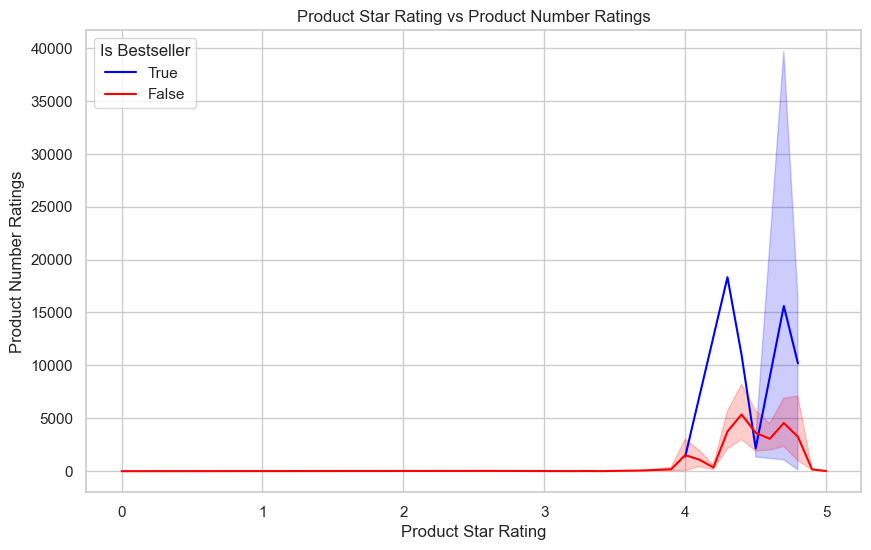

In [13]:
# Plot using Seaborn 
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))

# Plot for is_bestseller=True
sns.lineplot(data = df_sorted[df_sorted["is_best_seller"] == True], x = "product_star_rating", y = "product_num_ratings", color = "blue", label = "True")

# Plot for is_bestseller=False
sns.lineplot(data = df_sorted[df_sorted["is_best_seller"] == False], x = "product_star_rating", y = "product_num_ratings", color = "red", label = "False")

plt.title("Product Star Rating vs Product Number Ratings")
plt.xlabel("Product Star Rating")
plt.ylabel("Product Number Ratings")
plt.legend(title="Is Bestseller")
plt.show()

After analyzing the Product Star Rating versus Product Number of Ratings, it is apparent that bestselling items tend to receive a higher quantity of ratings without necessarily reaching a 5-star rating. Conversely, non-bestselling items typically accumulate around 5000 ratings and maintain a similar maximum star rating.

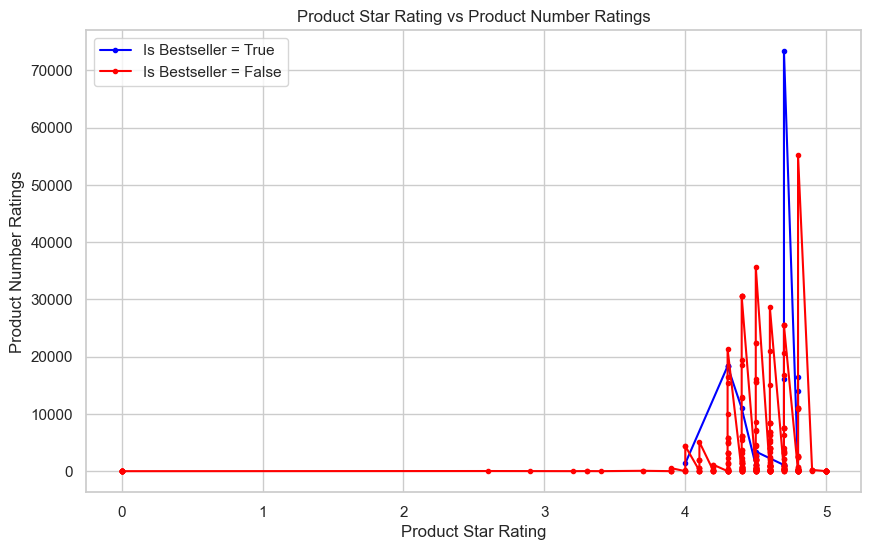

In [14]:
# Plot using Matplotlib
# Create a multiline plot
plt.figure(figsize=(10, 6))

# Plot for is_best_seller=True
plt.plot(df_sorted[df_sorted["is_best_seller"] == True]["product_star_rating"],
         df_sorted[df_sorted["is_best_seller"] == True]["product_num_ratings"],
         marker=".", linestyle="-", color="blue", label="Is Bestseller = True")

# Plot for is_best_seller=False
plt.plot(df_sorted[df_sorted["is_best_seller"] == False]["product_star_rating"],
         df_sorted[df_sorted["is_best_seller"] == False]["product_num_ratings"],
         marker=".", linestyle="-", color="red", label="Is Bestseller = False")

plt.title("Product Star Rating vs Product Number Ratings")
plt.xlabel("Product Star Rating")
plt.ylabel("Product Number Ratings")
plt.legend()
plt.grid(True)
plt.show()

# Analysis
